<a href="https://colab.research.google.com/github/EricXu1728/GoogleAIReader/blob/main/Task_2_Prompts_Gemini_Pro_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0
!pip install PyGithub
!pip install pylev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [3]:
!pip install spacy
!python -m spacy download en_core_web_md

2024-01-02 16:26:08.983271: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 16:26:08.983338: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 16:26:08.984854: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 16:26:08.993524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 16:26:10.260554: W tensorflow/compiler/tf2

In [4]:
'''
import requests

def download_file_from_github(repo_owner, repo_name, file_path, branch='master'):
    base_url = f'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}'
    response = requests.get(base_url)

    if response.status_code == 200:
        # File found, save it to your local directory or process it as needed
        with open(file_path.split("/")[-1], 'wb') as file:
            file.write(response.content)
        print(f"File '{file_path}' downloaded successfully.")
    else:
        print(f"Failed to download file '{file_path}'. Status code: {response.status_code}")

# Example usage:
repo_owner = 'onwuegbuchulem'
repo_name = 'WEB_SCRAPING_THUMBNAILS'


file_name = "1"

file_path = f'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg'

download_file_from_github(repo_owner, repo_name, file_path)

file_path = f'Documents/txt/01/{file_name}.txt'
download_file_from_github(repo_owner, repo_name, file_path)
'''


'\nimport requests\n\ndef download_file_from_github(repo_owner, repo_name, file_path, branch=\'master\'):\n    base_url = f\'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}\'\n    response = requests.get(base_url)\n\n    if response.status_code == 200:\n        # File found, save it to your local directory or process it as needed\n        with open(file_path.split("/")[-1], \'wb\') as file:\n            file.write(response.content)\n        print(f"File \'{file_path}\' downloaded successfully.")\n    else:\n        print(f"Failed to download file \'{file_path}\'. Status code: {response.status_code}")\n\n# Example usage:\nrepo_owner = \'onwuegbuchulem\'\nrepo_name = \'WEB_SCRAPING_THUMBNAILS\'\n\n\nfile_name = "1"\n\nfile_path = f\'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg\'\n\ndownload_file_from_github(repo_owner, repo_name, file_path)\n\nfile_path = f\'Documents/txt/01/{file_name}.txt\'\ndownload_file_from_github(repo_owner, repo_name, fil

## Configuring the Model

In [5]:
# setup
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=GOOGLE_AI_STUDIO)

In [6]:
for m in genai.list_models():
    print(m.name)
    print(m.supported_generation_methods)


models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


In [7]:

# Set up the model
generation_config = {
  "temperature": 0.,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


## Using Gemini Pro Vision

In [8]:
def get_text(file_name):
  file_path = f"{file_name}.txt"
  with open(file_path, 'r') as file:

      # Read the contents of the file and save it in a variable
      return file.read()




In [9]:
import os
import PIL.Image

def get_image(name):
  if(os.path.exists(f"{name}.png")):
    print(name)
    return PIL.Image.open(f'{name}.png')
  if(os.path.exists(f"{name}.jpg")):
    return PIL.Image.open(f'{name}.jpg')

  print("error occured")

In [10]:
def calculate_word_accuracy_words(ground_truth, recognized_text):
    # Split the ground truth and recognized text into lists of words
    ground_truth_words = ground_truth.split()
    recognized_words = recognized_text.split()

    # Find the intersection of the two lists to get correctly recognized words
    correct_words = set(ground_truth_words) & set(recognized_words)

    # Calculate Word Accuracy
    word_accuracy = len(correct_words) / len(set(ground_truth_words))

    return word_accuracy

# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "the quick brown fox jumps over the lazy"

accuracy = calculate_word_accuracy_words(ground_truth_text, recognized_text)
print(f"Word Accuracy: {accuracy:.2f}%")


Word Accuracy: 0.88%


In [11]:
import spacy
# Load the spaCy model with pre-trained word vectors
nlp = spacy.load("en_core_web_md")

def calculate_vector_accuracy(true_text, text):
  doc1 = nlp(true_text)
  doc2 = nlp(text)
  return doc1.similarity(doc2)


sentence1 = "The quick brown fox jumps over the lazy dog."
sentence2 = "A fast brown fox leaps over a sleepy canine."

print(calculate_vector_accuracy(sentence1, sentence2))

0.7671564505194697


In [12]:
import pylev
def calculate_word_accuracy_distance(ground_truth, recognized_text):
  ground_truth_words = ground_truth.split()
  recognized_words = recognized_text.split()
  distance =  pylev.levenshtein(ground_truth_words,recognized_words)

  max_string_length = max(len(ground_truth_words), len(recognized_words))
  return 1-(distance/max_string_length)


# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "quick the brown fox jumps over the lazy dog the the"

accuracy = calculate_word_accuracy_distance(ground_truth_text, recognized_text)
print(f"Word Accuracty: {accuracy:.2f}")

Word Accuracty: 0.64


In [13]:
def calculate_word_accuracy_distance_characters(ground_truth, recognized_text):
  distance =  pylev.levenshtein(ground_truth,recognized_text)

  max_string_length = max(len(ground_truth), len(recognized_text))
  return 1-(distance/max_string_length)


# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "quick the brown fox jumps over the lazy dog the the"

accuracy = calculate_word_accuracy_distance(ground_truth_text, recognized_text)
print(f"Word Penalty: {accuracy:.2f}")

Word Penalty: 0.64


In [14]:
def resize_with_aspect_ratio(image, target_width):
    # Calculate the aspect ratio
    aspect_ratio = image.width / image.height

    # Calculate the corresponding height based on the target width
    target_height = int(target_width / aspect_ratio)

    # Resize the image while maintaining the aspect ratio
    resized_image = image.resize((target_width, target_height))

    return resized_image

In [15]:
def test_recognition(file_name, image_width, prompt, show_result = True):
  img = get_image(file_name)

  img = resize_with_aspect_ratio(img, image_width)

  response = 0

  retries = 0
  max_retries = 5

  print("step1")
  while(response == 0 and retries<=max_retries):
    print("step2")
    try:
      response = model.generate_content([prompt, img])
      response.resolve()
    except:
      print("Error occured. Trying again")
      retries +=1

  width, height = img.size
  pixel_count = width*height

  if(show_result):
    display(img)
    #print(response.text)
  print("step2.5")
  print(response)
  print("step3")
  try:
    if response.text is None:
      print("response object is null")
    else:
      print("nothing went wrong")
  except:
    print("could not read text")
  print(response.text)
  print("step4")
  print(pixel_count)
  print("step5")
  return response.text, pixel_count




In [16]:
def run_predictions(file_name, resolutions, prompt_list):
  text_list = []
  pixel_list = []
  for prompt in prompt_list:
    print("start: " +str(prompt))
    pixels = []
    texts = []
    for res in resolutions:

      print("working "+str(res))
      ypoint, xpoint = test_recognition(file_name,res, prompt)
      print("finish "+str(res))
      pixels.append(xpoint)
      texts.append(ypoint)

    text_list.append(texts)
    pixel_list.append(pixels)

  return pixel_list, text_list



In [17]:
def judge_predictions(true_text, text_list):
  #distance_accuracy_list = []
  char_distance_accuracy_list = []
  word_accuracy_list = []

  for texts in text_list:
    distance_accuracy = []
    char_distance_accuracy = []
    word_accuracy = []
    for text in texts:
      #distance_accuracy.append(calculate_word_accuracy_distance(true_text, text))
      char_distance_accuracy.append(calculate_word_accuracy_distance(true_text, text))
      word_accuracy.append(calculate_vector_accuracy(true_text, text))
    #distance_accuracy_list.append(distance_accuracy)
    char_distance_accuracy_list.append(char_distance_accuracy)
    word_accuracy_list.append(word_accuracy)

  return char_distance_accuracy_list, word_accuracy_list #distance_accuracy_list, char_distance_accuracy_list, word_accuracy_list


In [18]:
from PIL import Image
#img =  Image.open("/content/drive/MyDrive/thumbnails/adversity.png")
#display(img)
#response = model.generate_content(["You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the words present in the image. If there are any gaps or areas where the text is not recognizable, you should fill in those gaps with predicted words. Analyze the compressed image and identify all the words that are visible. If there are any regions where the text is not recognizable, generate and fill in those gaps with predicted words based on context. Return all of the text, including those predicted in the gaps. Respond in plain text.", img])
#response.resolve()
#print(response.text)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def draw_and_run_predictions(file_name_list, sizes, prompts):

  # Now, the variable file_content contains the content of the text file
  file_content = get_text(file_name)
  print(file_content)
  img = get_image(file_name)
  display(img)

  print("working")

  pixel_list, text_list = run_predictions(file_name, sizes, prompts)

  print(text_list[0])
 # print(text_list[1])

  true_text = get_text(file_name)

  distance_accuracy_list, word_accuracy_list = judge_predictions(true_text, text_list)


  data_list = []
  catagories = []
  for i in range(len(sizes)):
    catagories += ["Word distance accuracy", "Vector Accuracy"]

  i = 0
  for i in range(len(prompts)):
    data = []
    for j in range (len(sizes)):
      data.append(distance_accuracy_list[i][j])
      data.append(word_accuracy_list[i][j])
    data_list.append(data)
    pass

  return catagories, data_list


In [20]:
def add_2d_lists(list1, list2):
    # Find dimensions of the input lists
    rows1, cols1 = len(list1), len(list1[0])
    rows2, cols2 = len(list2), len(list2[0])

    # Pad smaller list with zeros if necessary
    if rows1 > rows2:
        list2 += [[0] * cols2 for _ in range(rows1 - rows2)]
    elif rows1 < rows2:
        list1 += [[0] * cols1 for _ in range(rows2 - rows1)]

    if cols1 > cols2:
        list2 = [row + [0] * (cols1 - cols2) for row in list2]
    elif cols1 < cols2:
        list1 = [row + [0] * (cols2 - cols1) for row in list1]

    # Add corresponding elements
    result = [[list1[i][j] + list2[i][j] for j in range(cols1)] for i in range(rows1)]

    return result

In [21]:
def divide_2d_array(matrix, divisor):
    # Use nested list comprehension to divide each element by the divisor
    result = [[element / divisor for element in row] for row in matrix]
    return result

AI Technology
Chim adssa: 28
ericxu1728@terpmail.umd.edu :  16

Rapid Advances in Artificial Intelligence (22)
In the last decade, the field of artificial intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine learning algorithms. As a result, AI applications have permeated various aspects of our daily lives, from virtual assistants and recommendation systems to autonomous vehicles and advanced medical diagnostics.
The Rise of Sustainable Technologies (18)
As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Innovations in renewable energy, energy storage, and sustainable materials are becoming increasingly crucial in the quest for a more eco-friendly future. Solar and wind power technologies, once considered niche, have n

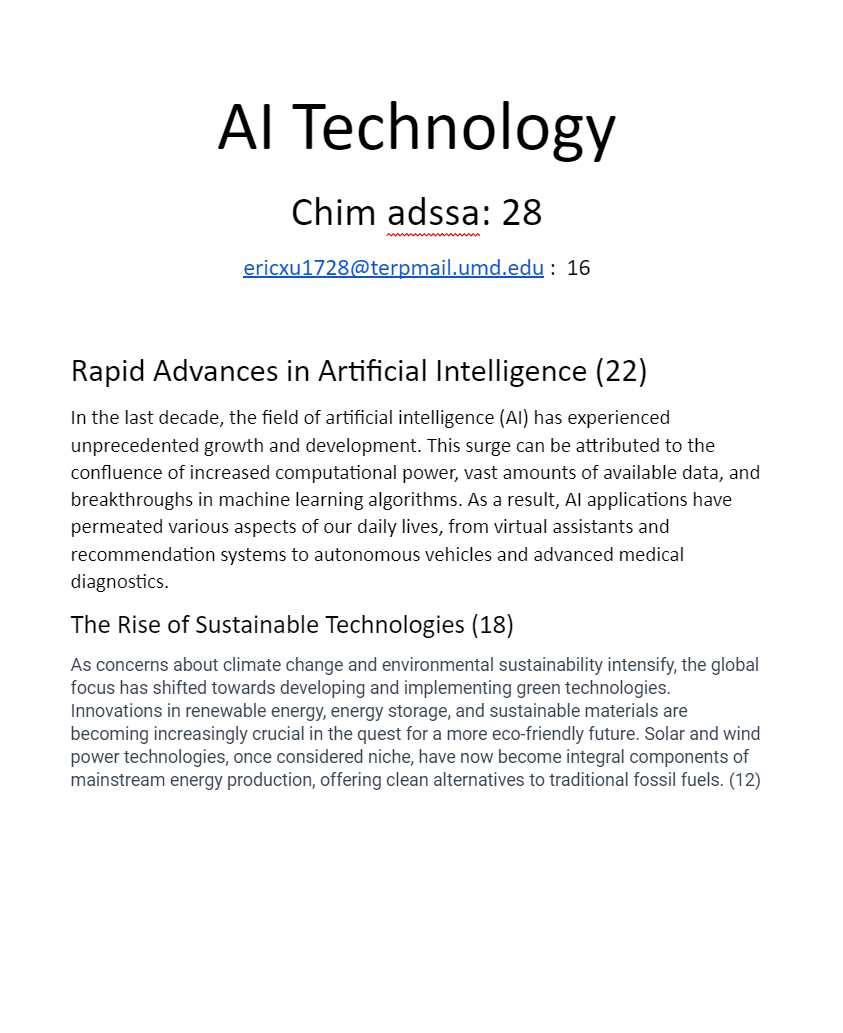

working
start: I want you to act as a digital forensic examiner specializing in text recognition on images. I will provide you with images containing text, and your role is to identify and transcribe the text present in those images. Your responses should focus solely on the recognized text, without providing additional information or analysis.
working 96
/content/drive/MyDrive/thumbnails/technology
step1
step2


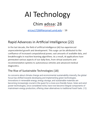

step2.5
step3
nothing went wrong
 AI Technology
Colm Adare 28
www.adare.ie
Rapid Advances in Artificial Intelligence (23)
Recent growth in the range and capabilities of Artificial Intelligence (AI) has been truly remarkable. The range of applications is vast and growing rapidly. The technology is already being used in a variety of ways to improve our lives, from powering self-driving cars to helping us find the best deals on products and services.
The Rise of Sustainable Technologies (18)
The term "sustainability" has been used in recent years to describe a wide range of technologies and practices that are designed to reduce the negative impact of human activities on the environment. These technologies include renewable energy sources, such as solar and wind power, as well as energy-efficient appliances and building materials.
step4
11232
step5
finish 96
start: You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and retu

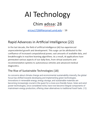

step2.5
step3
nothing went wrong
 AI Technology
Colm-ador 28
www.website.com

Rapid Advances in Artificial Intelligence (23)
Recent years have seen the rapid growth of artificial intelligence (AI), a field of computer science that aims to understand and create intelligent entities. This growth has been driven by a number of factors, including the increasing availability of data, the development of more powerful computers, and the rise of deep learning.

The Rise of Sustainable Technologies (18)
The world is facing a number of environmental challenges, including climate change, air pollution, and water scarcity. These challenges are having a significant impact on human health and the global economy. In response, there is a growing need for sustainable technologies that can help us to reduce our environmental impact.
step4
11232
step5
finish 96
start: You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the w

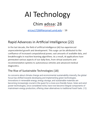

step2.5
step3
nothing went wrong
 AI Technology

Colm-ador 28

www.theaihub.com

Rapid Advances in Artificial Intelligence (23)

Recent years have seen a surge in interest in artificial intelligence (AI), with major advances being made in the field. This growth has been driven by a number of factors, including the availability of big data, the development of powerful new algorithms, and the increasing availability of computing power.

The Rise of Sustainable Technologies (18)

The world is facing a number of serious environmental challenges, including climate change, air pollution, and water scarcity. These challenges are having a significant impact on human health and the global economy. In response, there is a growing need for sustainable technologies that can help us to reduce our environmental impact.
step4
11232
step5
finish 96
start: Identify all the text in this blurry image. The title of the text is 'AI Technology'.
working 96
/content/drive/MyDrive/thumbnails/technology
step1


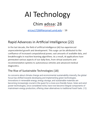

step2.5
step3
nothing went wrong
 # AI Technology
### CISM advice 28
www.cism.co.uk

Rapid Advances in Artificial Intelligence (23)
Recent years have seen rapid growth in the range and sophistication of artificial intelligence (AI) applications. The technology has the potential to transform many aspects of our lives, from the way we work and travel to the way we interact with the world around us.

The Rise of Sustainable Technologies (18)
The global sustainability agenda is driving demand for new technologies that can help us to reduce our environmental impact. This article explores some of the most promising sustainable technologies and assesses their potential to make a difference.
step4
11232
step5
finish 96
start: Identify all the text in the blurry image.
working 96
/content/drive/MyDrive/thumbnails/technology
step1
step2


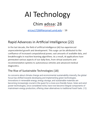

step2.5
step3
nothing went wrong
 AI Technology
Clem adler - 28
www.forbes.com

Rapid Advances in Artificial Intelligence (23)
Recent growth in the field of artificial intelligence (AI) has been exponential. The range of applications for this groundbreaking technology is vast, with the potential to revolutionize industries and improve our daily lives. From self-driving cars to facial recognition software, AI is already having a major impact on our world. And it's only going to become more prevalent in the years to come.

The Rise of Sustainable Technologies (18)
The world is facing a climate crisis, and we need to take action to reduce our impact on the environment. Sustainable technologies offer a way to do just that. These technologies are designed to be environmentally friendly and efficient, and they can help us to reduce our carbon footprint. From solar panels to electric vehicles, sustainable technologies are playing a vital role in the fight against climate change.
step4
11232
s

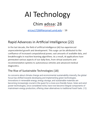

step2.5
step3
nothing went wrong
 I love cheese. I love the way it tastes, the way it smells, and the way it feels in my mouth. I love the way it can be used to make so many different dishes, from simple sandwiches to complex casseroles. And I love the way it can bring people together, whether it's at a family dinner or a party with friends.

I've been eating cheese since I was a little kid, and I've always loved it. I remember when I was about 6 years old, my mom made me a grilled cheese sandwich for lunch. It was the best grilled cheese sandwich I've ever had. The bread was perfectly toasted, the cheese was melted just right, and the butter was spread evenly on both sides. I ate that sandwich so fast that I didn't even taste it. But I remember the feeling of pure joy that I felt when I took that first bite.

As I got older, I started to appreciate cheese even more. I learned about the different types of cheese, the different ways to make it, and the different ways to eat it. I starte

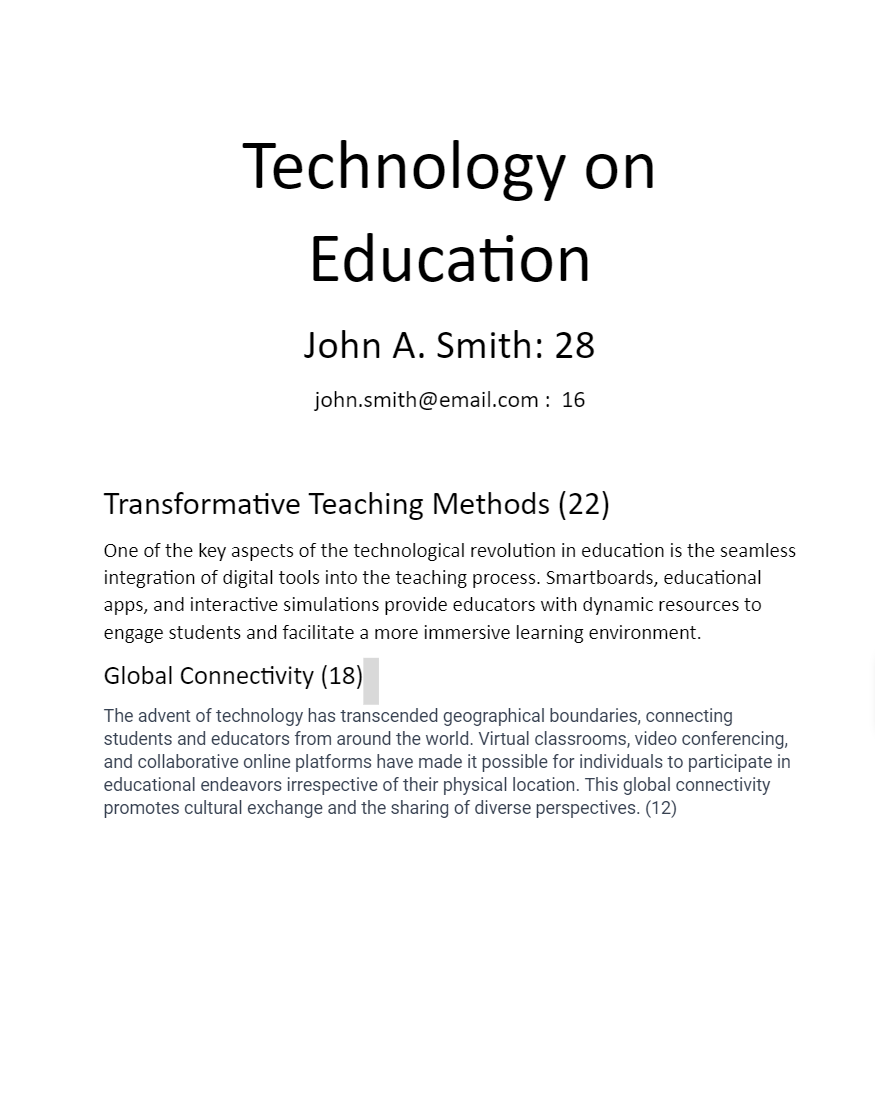

working
start: I want you to act as a digital forensic examiner specializing in text recognition on images. I will provide you with images containing text, and your role is to identify and transcribe the text present in those images. Your responses should focus solely on the recognized text, without providing additional information or analysis.
working 96
/content/drive/MyDrive/thumbnails/education
step1
step2


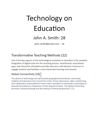

step2.5
step3
nothing went wrong
 Technology on Education
John A. Smith 26
jadsmith@example.com

Transformative Teaching Methods (123)
Innovative approaches to teaching and learning can dramatically improve student outcomes. Here are three methods that are proven to engage students and promote deeper learning:

1. Blended Learning
Blended learning is a teaching method that combines online and in-person instruction. In a blended learning environment, students learn at their own pace using online resources, and then come together in a physical classroom to discuss and apply what they have learned. This method allows students to take more control of their learning, and it can also help to improve student engagement and outcomes.

2. Project-Based Learning
Project-based learning is a teaching method that focuses on having students learn by doing. In a project-based learning environment, students work on real-world projects that are designed to challenge them and help them develop critical 

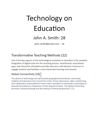

step2.5
step3
nothing went wrong
 Technology on Education
John A. Smith 28
Transformative Teaching Methods (123)
There is a growing body of research that suggests that the use of technology in education can have a positive impact on student learning. However, there is also evidence to suggest that the use of technology in education can be ineffective or even harmful if not used properly. In this paper, I will explore the potential benefits and drawbacks of using technology in education. I will also discuss some of the challenges that educators face in integrating technology into their teaching. Finally, I will offer some recommendations for how educators can use technology effectively to improve student learning.

The potential benefits of using technology in education are numerous. For example, technology can be used to:

* Increase student engagement and motivation.
* Personalize learning experiences.
* Provide students with access to a wider range of resources.
* Help students devel

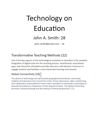

step2.5
step3
nothing went wrong
 Technology on Education
John A. Smith 28

Transformative Teaching Methods (123)
Change is the only constant in life, and nowhere is this more evident than in the field of education. In recent years, technology has become an integral part of daily life, and education is no exception. From online learning to interactive whiteboards, technology is transforming the way that students learn and teachers teach.

In this paper, I will explore the impact of technology on education. I will begin by discussing the different ways that technology is being used in the classroom today. I will then examine the benefits and challenges of using technology in education. Finally, I will offer some predictions about the future of technology in education.
step4
11616
step5
finish 96
start: Identify all the text in this blurry image. The title of the text is 'Technology on Education'.
working 96
/content/drive/MyDrive/thumbnails/education
step1
step2


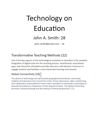

step2.5
step3
nothing went wrong
 Technology on Education
John A. Smith 28
Transformative Teaching Methods (123)
Many people believe that the use of technology in education is a relatively new phenomenon. However, a brief look at the history of education reveals that this is not the case. In fact, the use of technology in education can be traced back to the very beginning of formal education.
One of the earliest examples of the use of technology in education is the use of the abacus. The abacus is a simple device that has been used for centuries to perform mathematical calculations. It is believed that the abacus was first used in China around 2000 BC. From there, it spread to other parts of the world, including Europe and the Middle East. The abacus was used in schools to teach students how to perform basic arithmetic operations, such as addition, subtraction, multiplication, and division.
Another early example of the use of technology in education is the use of the chalkboard. The ch

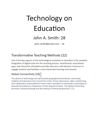

step2.5
step3
nothing went wrong
 Technology on Education

John A. Smith 28

Transformative Teaching Methods (123)

Many people believe that the use of technology in education is a relatively new phenomenon. However, a brief look at the history of education reveals that technology has been used in education for centuries. In fact, some of the earliest forms of technology, such as the chalkboard and the textbook, are still in use today.

Of course, the use of technology in education has changed dramatically over time. In the past, technology was used primarily to support traditional teaching methods. For example, teachers might use a chalkboard to write down notes or use a textbook to lead a discussion. Today, technology is used in a much more interactive way. Students can use computers to research topics, create presentations, and collaborate with classmates.

The use of technology in education has many benefits. For example, technology can help to improve student engagement and motiva

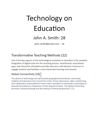

step2.5
step3
nothing went wrong
 I love cheese. I love the way it tastes, the way it smells, and the way it feels in my mouth. I love the way it can be used to make so many different dishes, from simple sandwiches to complex casseroles. And I love the way it can bring people together, whether they're sharing a plate of cheese and crackers at a party or sitting down to a fondue dinner.

I've been eating cheese since I was a little kid, and I've always loved it. I remember my mom making me grilled cheese sandwiches for lunch, and I would always ask for extra cheese. I also loved going to the grocery store with my parents and picking out new cheeses to try.

As I got older, I started to learn more about cheese and how it's made. I learned about the different types of milk that can be used to make cheese, the different cultures that are used to ferment the milk, and the different ways that cheese can be aged. I also learned about the different flavors and textures of cheese, and how they 

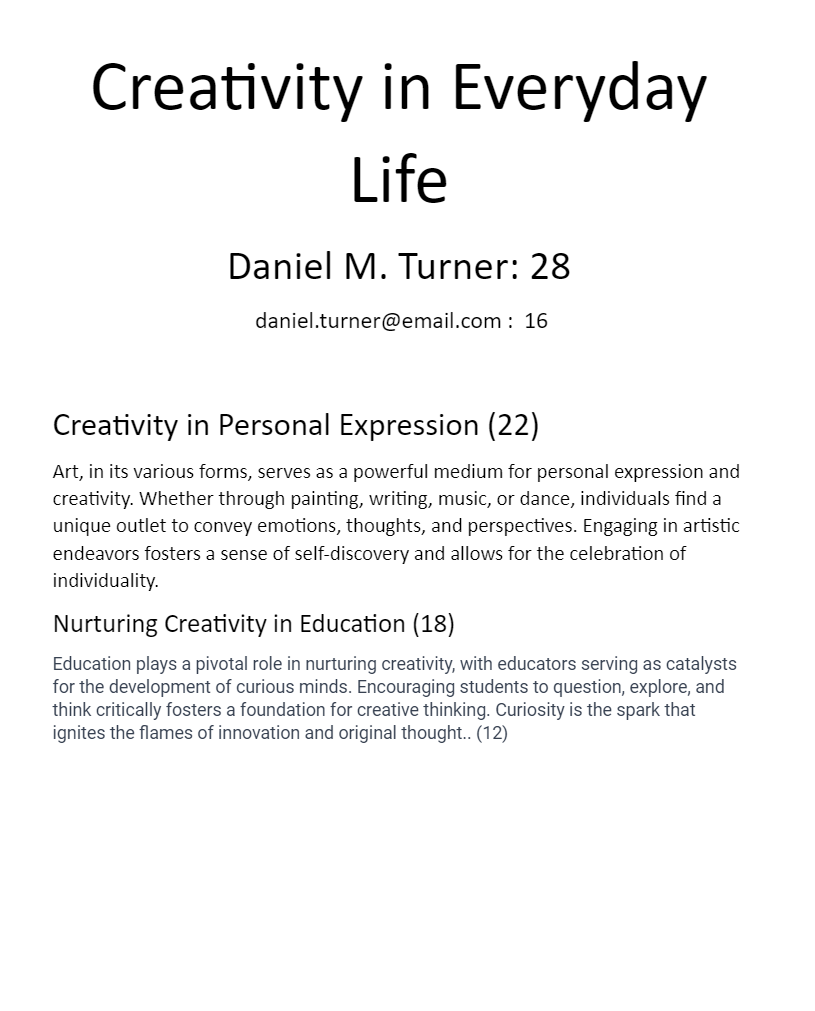

working
start: I want you to act as a digital forensic examiner specializing in text recognition on images. I will provide you with images containing text, and your role is to identify and transcribe the text present in those images. Your responses should focus solely on the recognized text, without providing additional information or analysis.
working 96
/content/drive/MyDrive/thumbnails/creativity
step1
step2


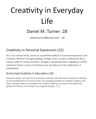

step2.5
step3
nothing went wrong
 Creativity in Everyday Life

Daniel M. Snyder - 18
dmsnyder@cox.net

Creativity in Personal Expression (CPE)
We all have the capacity to be creative. Creativity is not limited to a select few. Everyone has the potential to express themselves creatively. Creativity is not about being perfect. It is about being willing to try new things and take risks. It is about being open to new ideas and experiences.

Fostering Creativity in Education
Many schools today are focused on standardized testing and preparing students for college. This focus on academics has led to a decline in creativity in education. Students are not given the opportunity to explore their own interests and develop their own creative talents.

Creativity in the Workplace
Creativity is essential for success in the workplace. Employers are looking for employees who can think outside the box and come up with new ideas. Creativity can help you to stand out from the competition and get the job 

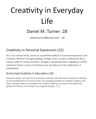

step2.5
step3
nothing went wrong
 Creativity in Everyday Life
Daniel M. Sorenson - 18
sorenson@boisestate.edu

Creativity in Personal Expression (CPE)
We all have the natural ability to be creative. As children, we are naturally curious and open to new experiences. We are not afraid to try new things and we are not afraid to make mistakes. As we grow older, however, we often lose this natural creativity. We become more focused on what is practical and what is expected of us. We start to worry about what other people will think of us if we try something new and different.

Fostering Creativity in Education
Many people believe that creativity is a trait that you are either born with or you are not. However, research has shown that creativity can be learned and developed. One of the best ways to foster creativity in education is to provide students with opportunities to explore their own interests and to experiment with new ideas. Students should be encouraged to take risks and to not be 

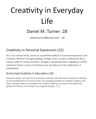

step2.5
step3
nothing went wrong
 Creativity in Everyday Life

Daniel M. Sorenson, Ph.D.
sorenson@creducation.com

Creativity in Personal Expression (CPE)
We all have the ability to be creative. Creativity is the process of developing new and innovative ideas and applying them to problem solving. Although creativity is often thought of as something that only artists and other creative professionals possess, the truth is that we all have the potential to be creative. Creativity is not limited to any one field or discipline; it can be applied to any aspect of our lives.

Fostering Creativity in Education
Creativity is an essential skill for success in the 21st century. In a world that is constantly changing, we need to be able to think creatively and come up with new solutions to problems. Education plays a vital role in fostering creativity in students. By providing students with opportunities to explore their creativity and develop their creative skills, we can help them to become more

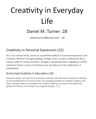

step2.5
step3
nothing went wrong
 Creativity in Everyday Life
Daniel M. Seater - 18
dseater@sfu.ca

Creativity in Personal Expression (CPE)
We all have the capacity to be creative, and we all use creativity in our everyday lives. When we express ourselves creatively, we are not only communicating our thoughts and feelings, but we are also making sense of the world around us. Creativity is a way of understanding and coping with our experiences, and it can also be a source of great joy and satisfaction.

Fostering Creativity in Education
Creativity is not something that can be taught in a traditional sense, but it can be fostered through education. By providing students with opportunities to explore their own creativity, and by encouraging them to take risks and experiment, we can help them to develop their creative potential.

Creativity in the Workplace
Creativity is an essential skill in the workplace. In today's rapidly changing economy, businesses are looking for employees who can t

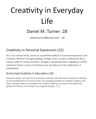

step2.5
step3
nothing went wrong
 Creativity in Everyday Life

Daniel M. Snyder · 2018
sagecreativity.com · 3

Creativity in Personal Expression (PE)
We all have the capacity to be creative, and we all express our creativity in different ways. Some of us are more creative in our personal lives, while others are more creative in their professional lives. Some of us are more creative in our artistic endeavors, while others are more creative in our problem-solving skills. No matter how we express our creativity, it is an important part of our lives.

Nurturing Creativity in Education
Creativity is often seen as a natural talent, something that some people are born with and others are not. However, research has shown that creativity can be learned and developed. This is good news for educators, as it means that we can help our students to become more creative.

There are many things that educators can do to nurture creativity in their students. One important thing is to provide students wi

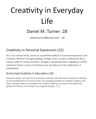

step2.5
step3
nothing went wrong
 I love cheese. I love the way it tastes, the way it smells, and the way it feels in my mouth. I love the way it can be used to make so many different dishes, from simple sandwiches to complex casseroles. And I love the way it can bring people together, whether it's at a family dinner or a party with friends.

I've been eating cheese since I was a little kid, and I've always loved it. I remember when I was about 6 years old, my mom made me a grilled cheese sandwich for lunch. It was the best thing I had ever tasted. The cheese was melted and gooey, and the bread was perfectly toasted. I ate it so fast that I didn't even taste the tomato soup that was supposed to go with it.

As I got older, I started to appreciate cheese even more. I learned about the different types of cheese, and I started to experiment with different ways to use it. I discovered that I loved cheese on pizza, in pasta, and even in salads. I also started to enjoy eating cheese by itsel

In [22]:
from types import new_class
file_name = "/content/drive/MyDrive/thumbnails/technology"

sizes = [96]

long_prompt = "You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the words present in the image. If there are any gaps or areas where the text is not recognizable, you should fill in those gaps with predicted words. Analyze the compressed image and identify all the words that are visible. If there are any regions where the text is not recognizable, generate and fill in those gaps with predicted words based on context. Return all of the text, including those predicted in the gaps. Respond in plain text."


titles = ["AI Technology", "Technology on Education", "Creativity in Everyday Life", "Adversity in Modern Society"]

prompt_list = []
for title in titles:
  title_prompt = f"You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the words present in the image. Th title of the document is {title}. If there are any gaps or areas where the text is not recognizable, you should fill in those gaps with predicted words. Analyze the compressed image and identify all the words that are visible. If there are any regions where the text is not recognizable, generate and fill in those gaps with predicted words based on context. Return all of the text, including those predicted in the gaps. Respond in plain text."
  random = "You are Rolindo Gambini. You love cheese and love rambling about cheese. You are to write an essay about how much you love cheese."


  prompt_list.append(["I want you to act as a digital forensic examiner specializing in text recognition on images. I will provide you with images containing text, and your role is to identify and transcribe the text present in those images. Your responses should focus solely on the recognized text, without providing additional information or analysis.", title_prompt, long_prompt, f"Identify all the text in this blurry image. The title of the text is '{title}'.", "Identify all the text in the blurry image.", random])
  #prompt_list.append([random])

final_data_list = []

catagories, data_list = draw_and_run_predictions(file_name, sizes, prompt_list[0])
final_data_list = data_list

file_name = "/content/drive/MyDrive/thumbnails/education"
catagories, data_list = draw_and_run_predictions(file_name, sizes, prompt_list[1])
final_data_list = add_2d_lists(final_data_list, data_list)

file_name = "/content/drive/MyDrive/thumbnails/creativity"
catagories, data_list  = draw_and_run_predictions(file_name,sizes, prompt_list[2])
final_data_list = add_2d_lists(final_data_list, data_list)




 Adversity in Modern Society
 Marcus J. Thompson: 28
marcus.thompson@email.com :  16

Understanding Resilience (22)
At its core, resilience is the ability to adapt and bounce back in the face of setbacks. Life is replete with unexpected twists and turns, and those who exhibit resilience possess the capacity to embrace change, learn from experiences, and forge ahead with newfound strength.
Personal Development (18)
Adversity often serves as a crucible for personal growth. Resilient individuals view setbacks as opportunities for learning and self-discovery. Embracing challenges with a growth-oriented mindset allows for the acquisition of valuable skills and a deeper understanding of one's own strengths. (12)


/content/drive/MyDrive/thumbnails/adversity


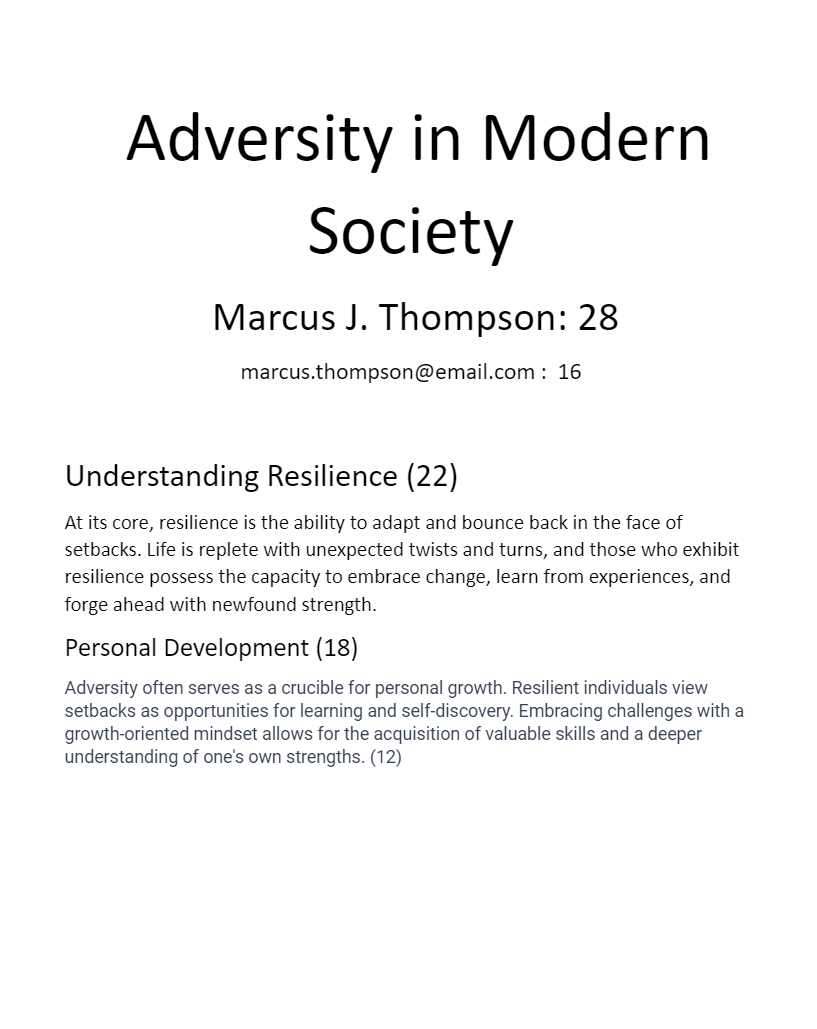

working
start: I want you to act as a digital forensic examiner specializing in text recognition on images. I will provide you with images containing text, and your role is to identify and transcribe the text present in those images. Your responses should focus solely on the recognized text, without providing additional information or analysis.
working 96
/content/drive/MyDrive/thumbnails/adversity
step1
step2


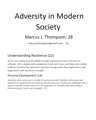

step2.5
step3
nothing went wrong
 Adversity in Modern Society

Marcus A. Thompson, 28
Understanding Resilience (225)

Human beings are adaptable creatures. We have the ability to overcome great adversity and to thrive in the face of challenges. This ability is known as resilience.

Resilience is the ability to withstand adversity and to bounce back from setbacks. It is the ability to adapt to change and to grow from our experiences.

There are many factors that contribute to resilience. Some of these factors include:

* **Optimism:** Resilient people tend to be optimistic about the future. They believe that they can overcome challenges and that they will eventually achieve their goals.
* **Self-efficacy:** Resilient people have a strong sense of self-efficacy. They believe in their own abilities and they are confident that they can succeed.
* **Social support:** Resilient people have strong social support networks. They have friends and family who they can rely on for support and encou

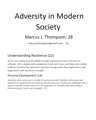

step2.5
step3
nothing went wrong
 Adversity in Modern Society
Marcus A. Thompson, 28
Understanding Resilience (225)
Human beings are often adversely affected by the world around them. This can be due to a number of factors, such as natural disasters, economic downturns, or personal tragedies. However, some people seem to be able to bounce back from these challenges and thrive, while others may become overwhelmed and give up. What is it that makes some people more resilient than others?
In this chapter, we will explore the concept of resilience and discuss some of the factors that contribute to it. We will also provide some tips on how to build your own resilience so that you can better cope with the challenges that life throws your way.
step4
11520
step5
finish 96
start: You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the words present in the image. If there are any gaps or areas where the text is not 

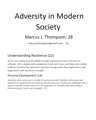

step2.5
step3
nothing went wrong
 Adversity in Modern Society
Marcus H. Thompson, 28
Understanding Resilience (225)
Human beings are the most adaptable and resilient species on the planet. We have survived and thrived in every imaginable environment, from the frozen tundra to the scorching desert. We have faced countless challenges and adversities, from natural disasters to wars to economic collapse. And yet, we have always found a way to bounce back and rebuild.

What is it that makes us so resilient? What allows us to overcome such seemingly insurmountable obstacles? In this book, I will argue that the key to our resilience lies in our ability to learn and adapt. We are constantly learning from our experiences, and we use this knowledge to make better decisions in the future. We are also able to adapt our behavior to new and changing circumstances. This flexibility is essential for our survival in an ever-changing world.
step4
11520
step5
finish 96
start: Identify all the text in thi

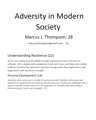

step2.5
step3
nothing went wrong
 Adversity in Modern Society
Marcus A. Thompson, 28
Understanding Resilience (225)
Human beings are often defined by the ways in which they respond to adversity. This course examines the psychological processes that help people to cope with and overcome adversity, including stress, trauma, and loss. Topics include:
• Psychological theories of resilience
• Risk and protective factors for resilience
• Resilience in different populations
• Promoting resilience in individuals and communities
step4
11520
step5
finish 96
start: Identify all the text in the blurry image.
working 96
/content/drive/MyDrive/thumbnails/adversity
step1
step2


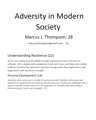

step2.5
step3
nothing went wrong
 Adversity in Modern Society

Marcus A. Thompson 28
Understanding Resilience (225)
Human resilience is the ability to withstand adversity and bounce back from difficult life events. It is the capacity to cope with stress, adapt to change, and recover from setbacks.

People who are resilient are able to maintain a sense of balance and perspective, even in the face of adversity. They are able to find meaning and purpose in their lives, even when things are tough. They are also able to connect with others and build strong relationships, which can help them to cope with stress.

Resilience is not something that we are born with. It is a skill that can be learned and developed. There are many things that we can do to build our resilience, such as:

* **Developing a positive outlook on life.** People who are resilient tend to be optimistic and believe that they can overcome challenges. They are also able to find humor in difficult situations.
* **Setting real

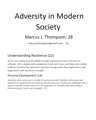

step2.5
step3
nothing went wrong
 Cheese is one of the most delicious and versatile foods in the world. It can be enjoyed on its own, as a snack, or as an ingredient in a variety of dishes. There are hundreds of different types of cheese, each with its own unique flavor, texture, and aroma.

I love cheese. I love the way it tastes, the way it smells, and the way it feels in my mouth. I love the way it can be paired with so many different foods and drinks. I love the way it can be used to create such a variety of dishes.

One of my favorite things about cheese is its versatility. It can be used in so many different ways, from a simple snack to a complex dish. I love to experiment with different types of cheese and find new ways to use them.

I also love the way cheese can be paired with so many different foods and drinks. It is the perfect complement to a glass of wine, a slice of bread, or a bowl of soup. It can also be used to add flavor to salads, sandwiches, and casseroles.

Cheese 

In [23]:


file_name = "/content/drive/MyDrive/thumbnails/adversity"
catagories, data_list = draw_and_run_predictions(file_name, sizes, prompt_list[3])
final_data_list = add_2d_lists(final_data_list, data_list)


In [24]:
#new_prompt = "You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the words present in the image. If there are any gaps or areas where the text is not recognizable, you should fill in those gaps with predicted words. Analyze the compressed image and identify all the words that are visible. If there are any regions where the text is not recognizable, generate and fill in those gaps with predicted words based on context. Return all of the text, including those predicted in the gaps. Respond in plain text."

#file_name = "/content/drive/MyDrive/thumbnails/climb"
#catagories, data_list = draw_and_run_predictions(file_name, [48], [new_prompt,"Identify all the text in this blurry image. The title of the text is 'Adversity in Modern Society'", "Identify all the text in this blurry image:", "Ignore the image. Type an essay about the unprecidented growth of Artificial Intelligence"])
#final_data_list = add_2d_lists(final_data_list, data_list)


In [25]:
final_data_list = divide_2d_array(final_data_list, 4)

In [26]:
def draw_data(catagories, data_list, prompts):

  prompt_count = len(prompts)
  # Set up figure and axis
  fig, ax = plt.subplots()

  # Bar width
  bar_width = 0.2

  # Set positions for the bars
  bar_positions = np.arange(len(catagories))


  for i in range(prompt_count):
    # Plot the bars with transparency
    print(i)
    ax.bar(bar_positions+(i/8), data_list[i], width=bar_width, label=prompts[i], alpha=0.95, zorder = i*20)


  # Set labels and title
  ax.set_xlabel('Catagories')
  ax.set_ylabel('Accuracy')
  ax.set_title('Accuracy using different prompts on a resolution 96 thumbnail')
  ax.set_xticks(bar_positions)
  ax.set_xticklabels(catagories, rotation = 90)
  ax.legend()
  # Show the plot
  plt.show()

['Word distance accuracy', 'Vector Accuracy']
[[0.10546064698459678, 0.8641896672802506], [0.1144563458331884, 0.8732013286514552], [0.1132940565543856, 0.8963281575567102], [0.11373569353673374, 0.912552930530057], [0.10637320718449758, 0.8805379703360197], [0.05297254362200021, 0.6477884450526296]]
0
1
2
3
4
5


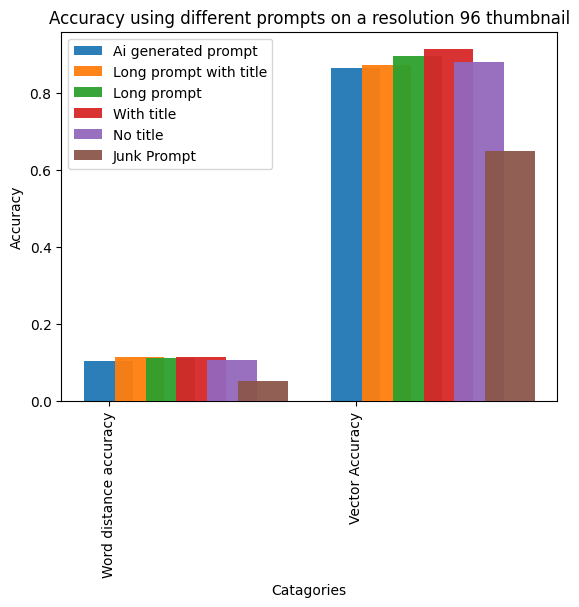

In [27]:
print(catagories)
print(final_data_list)
draw_data(catagories, final_data_list, ["Ai generated prompt", "Long prompt with title", "Long prompt","With title","No title","Junk Prompt"])

In [28]:
oput = "Creativity in Everyday Life Daniel M. Scott: 28 daniel.scott@email.com : 16 Creativity in Personal Expression (22) Creativity is an inherent part of human existence. It is the ability to think outside the box, to see connections where others see none, and to express oneself uniquely. While often associated with artistic pursuits, creativity is not limited to a specific domain. It can manifest in various aspects of life, from personal expression to problem-solving and innovation. Fostering Creativity in Education (18) Education has a pivotal role in nurturing creativity. By providing opportunities for self-expression, critical thinking, and exploration, educators can help students develop their creative potential. Encouraging students to embrace ambiguity, take risks, and learn from mistakes fosters an environment conducive to creativity. (12)"



In [29]:
truth = get_text("/content/drive/MyDrive/thumbnails/creativity")

In [30]:
calculate_vector_accuracy(truth, oput)

0.9650781033250301

In [31]:
calculate_word_accuracy_distance(truth, oput)

0.19672131147540983